In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

import json




# Load the intents dataset
with open('intents.json') as file:
    data = json.load(file)



2024-04-22 12:41:00.007572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-22 12:41:00.007614: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Extract patterns and tags
patterns = []
tags = []
responses = []
tag_to_index = {}  # To map tags to numerical values
index_to_tag = {}  # To map numerical values back to tags


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from nltk.corpus import stopwords
import nltk
import json

In [4]:
for i, intent in enumerate(data['intents']):
    tag = intent['tag']
    tag_to_index[tag] = i
    index_to_tag[i] = tag

    # Apply preprocessing: removing stop words
    stop_words = set(stopwords.words('english'))
    cleaned_patterns = [word for word in intent['patterns'] if word.lower() not in stop_words]

    patterns.extend(cleaned_patterns)
    tags.extend([i] * len(cleaned_patterns))  # Use numerical values instead of strings
    responses.extend(intent['responses'])


In [5]:
#for i, intent in enumerate(data['intents']):
#    tag = intent['tag']
#    tag_to_index[tag] = i
#    index_to_tag[i] = tag

#    patterns.extend(intent['patterns'])
 #   tags.extend([i] * len(intent['patterns']))  # Use numerical values instead of strings
#    responses.extend(intent['responses'])

# Print the data
print("tag_to_index:", tag_to_index)
print("index_to_tag:", index_to_tag)
print("patterns:", patterns)
print("tags:", tags)
print("responses:", responses)


tag_to_index: {'wishing': 1, 'responses': 2, 'view_bill': 3, 'change_billing_address': 4, 'upgrade_downgrade_plan': 5, 'current_data_usage': 6, 'check_account_balance': 7, 'add_remove_services': 8, 'internet_not_working': 9, 'call_issues': 10, 'voicemail_setup': 11, 'no_service': 12, 'configure_apn_settings': 13}
index_to_tag: {0: 'wishing', 1: 'wishing', 2: 'responses', 3: 'view_bill', 4: 'change_billing_address', 5: 'upgrade_downgrade_plan', 6: 'current_data_usage', 7: 'check_account_balance', 8: 'add_remove_services', 9: 'internet_not_working', 10: 'call_issues', 11: 'voicemail_setup', 12: 'no_service', 13: 'configure_apn_settings'}
patterns: ['hi', 'how are you ?', 'hello', 'hi', 'how are you ?', 'hello', 'thank you', 'thanks a lot', 'appreciate it', 'How can I view my bill?', 'Where can I see my bill?', 'I need to check my bill, how can I do that?', 'How do I access my billing information?', 'Can you help me find my bill?', 'Where do I go to view my bill?', 'I want to see my bill.

In [6]:
# Tokenize the patterns
tokenizer = Tokenizer()
tokenizer.fit_on_texts(patterns)
total_words = len(tokenizer.word_index) + 1

# Display details
print("Total words after tokenization:", total_words)
print("Word index:", tokenizer.word_index)


Total words after tokenization: 248
Word index: {'my': 1, 'i': 2, 'to': 3, 'how': 4, 'do': 5, 'can': 6, 'what': 7, 'plan': 8, 'the': 9, 'is': 10, 'phone': 11, "what's": 12, 'you': 13, 'billing': 14, 'on': 15, 'for': 16, 'balance': 17, 'voicemail': 18, 'apn': 19, 'address': 20, 'internet': 21, 'services': 22, 'data': 23, "'no": 24, "service'": 25, 'bill': 26, 'should': 27, 'or': 28, 'account': 29, 'where': 30, "i'm": 31, 'steps': 32, 'current': 33, 'it': 34, 'me': 35, 'usage': 36, 'a': 37, 'need': 38, 'help': 39, 'calls': 40, 'find': 41, 'check': 42, 'change': 43, 'there': 44, 'working': 45, 'process': 46, 'upgrade': 47, 'adding': 48, 'removing': 49, 'with': 50, 'fix': 51, 'not': 52, 'up': 53, 'why': 54, 'settings': 55, 'access': 56, 'want': 57, 'take': 58, 'by': 59, 'setup': 60, 'does': 61, 'in': 62, 'update': 63, 'way': 64, 'connection': 65, 'call': 66, 'are': 67, 'guide': 68, 'procedure': 69, 'from': 70, 'if': 71, 'making': 72, 'receiving': 73, 'see': 74, 'that': 75, 'information': 7

In [7]:

# Create training data
input_sequences = tokenizer.texts_to_sequences(patterns)
input_padded = pad_sequences(input_sequences)

# Create one-hot encoding for the tags
labels = tf.keras.utils.to_categorical(tags)


In [8]:
# Create training data
input_sequences = tokenizer.texts_to_sequences(patterns)
input_padded = pad_sequences(input_sequences)
# Create one-hot encoding for the tags
labels = tf.keras.utils.to_categorical(tags)
# Display information about the training data
print("Input sequences:")
for seq in input_sequences:
    print(seq)

print("\nInput padded sequences:")
print(input_padded)

print("\nLabels (one-hot encoding):")
print(labels)


Input sequences:
[125]
[4, 67, 13]
[126]
[125]
[4, 67, 13]
[126]
[161, 13]
[162, 37, 163]
[164, 34]
[4, 6, 2, 84, 1, 26]
[30, 6, 2, 74, 1, 26]
[2, 38, 3, 42, 1, 26, 4, 6, 2, 5, 75]
[4, 5, 2, 56, 1, 14, 76]
[6, 13, 39, 35, 41, 1, 26]
[30, 5, 2, 85, 3, 84, 1, 26]
[2, 57, 3, 74, 1, 26, 7, 27, 2, 5]
[12, 9, 46, 16, 102, 1, 26]
[6, 13, 68, 35, 15, 4, 3, 42, 1, 26]
[31, 127, 16, 1, 26, 30, 5, 2, 41, 34]
[4, 6, 2, 56, 1, 14, 165]
[7, 32, 5, 2, 58, 3, 84, 1, 26]
[30, 5, 2, 41, 1, 14, 103]
[166, 13, 128, 35, 62, 167, 1, 26]
[31, 168, 3, 41, 1, 26, 86, 129]
[30, 6, 2, 56, 1, 169, 14, 76]
[12, 9, 69, 16, 102, 1, 26]
[4, 5, 2, 104, 3, 1, 26]
[31, 87, 62, 130, 1, 26, 12, 9, 46]
[12, 9, 170, 16, 102, 1, 26]
[6, 2, 63, 1, 14, 20]
[4, 5, 2, 43, 1, 14, 20]
[10, 34, 77, 3, 78, 1, 14, 20]
[30, 6, 2, 63, 1, 14, 20]
[6, 2, 43, 9, 20, 15, 1, 26]
[4, 5, 2, 105, 1, 14, 20]
[2, 38, 3, 43, 1, 14, 20, 4, 6, 2, 5, 75]
[12, 9, 46, 16, 131, 1, 14, 20]
[6, 13, 68, 35, 15, 4, 3, 63, 1, 14, 20]
[2, 57, 3, 63, 9, 14, 2

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Define your RNN model with bidirectional LSTM layers
model = Sequential([
    Embedding(total_words, 128, input_length=input_padded.shape[1]),
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(data['intents']), activation='softmax')
])


2024-04-22 12:41:17.788818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-22 12:41:17.788871: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-22 12:41:17.788908: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (admin1-HP-EliteBook-840-G1): /proc/driver/nvidia/version does not exist
2024-04-22 12:41:17.789352: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(input_padded, labels, epochs=1000)

# Save the model
model.save('chatbot_model.h5')


2024-04-22 12:41:21.835075: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-04-22 12:41:21.836559: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2494195000 Hz


Epoch 1/1000
8/8 [==============================] - 24s 443ms/step - loss: 2.6391 - accuracy: 0.0917
Epoch 2/1000
8/8 [==============================] - 4s 440ms/step - loss: 2.6253 - accuracy: 0.1048
Epoch 3/1000
8/8 [==============================] - 4s 468ms/step - loss: 2.6061 - accuracy: 0.1004
Epoch 4/1000
8/8 [==============================] - 4s 489ms/step - loss: 2.5734 - accuracy: 0.1135
Epoch 5/1000
8/8 [==============================] - 4s 455ms/step - loss: 2.5417 - accuracy: 0.1004
Epoch 6/1000
8/8 [==============================] - 4s 445ms/step - loss: 2.4505 - accuracy: 0.1485
Epoch 7/1000
8/8 [==============================] - 3s 429ms/step - loss: 2.3357 - accuracy: 0.1834
Epoch 8/1000
8/8 [==============================] - 4s 442ms/step - loss: 2.2217 - accuracy: 0.2314
Epoch 9/1000
8/8 [==============================] - 4s 439ms/step - loss: 2.2215 - accuracy: 0.1921
Epoch 10/1000
8/8 [==============================] - 3s 428ms/step - loss: 2.1312 - accuracy: 0.253

8/8 [==============================] - 2s 252ms/step - loss: 0.2499 - accuracy: 0.9345
Epoch 83/1000
8/8 [==============================] - 2s 253ms/step - loss: 0.2187 - accuracy: 0.9432
Epoch 84/1000
8/8 [==============================] - 2s 263ms/step - loss: 0.2466 - accuracy: 0.9214
Epoch 85/1000
8/8 [==============================] - 2s 253ms/step - loss: 0.1976 - accuracy: 0.9389
Epoch 86/1000
8/8 [==============================] - 2s 252ms/step - loss: 0.1785 - accuracy: 0.9432
Epoch 87/1000
8/8 [==============================] - 2s 255ms/step - loss: 0.1667 - accuracy: 0.9520
Epoch 88/1000
8/8 [==============================] - 3s 358ms/step - loss: 0.2072 - accuracy: 0.9389
Epoch 89/1000
8/8 [==============================] - 4s 457ms/step - loss: 0.1816 - accuracy: 0.9476
Epoch 90/1000
8/8 [==============================] - 4s 446ms/step - loss: 0.1918 - accuracy: 0.9432
Epoch 91/1000
8/8 [==============================] - 4s 438ms/step - loss: 0.2172 - accuracy: 0.9432
Epoc

8/8 [==============================] - 3s 351ms/step - loss: 1.8745 - accuracy: 0.3799
Epoch 163/1000
8/8 [==============================] - 3s 399ms/step - loss: 1.4915 - accuracy: 0.5153
Epoch 164/1000
8/8 [==============================] - 4s 441ms/step - loss: 1.4940 - accuracy: 0.5415
Epoch 165/1000
8/8 [==============================] - 3s 336ms/step - loss: 1.4930 - accuracy: 0.5022
Epoch 166/1000
8/8 [==============================] - 4s 429ms/step - loss: 0.9529 - accuracy: 0.6638
Epoch 167/1000
8/8 [==============================] - 4s 449ms/step - loss: 0.9928 - accuracy: 0.6725
Epoch 168/1000
8/8 [==============================] - 3s 377ms/step - loss: 1.1744 - accuracy: 0.6550
Epoch 169/1000
8/8 [==============================] - 3s 401ms/step - loss: 0.7312 - accuracy: 0.7729
Epoch 170/1000
8/8 [==============================] - 2s 300ms/step - loss: 0.6983 - accuracy: 0.7598
Epoch 171/1000
8/8 [==============================] - 3s 329ms/step - loss: 0.6136 - accuracy: 0.

8/8 [==============================] - 5s 634ms/step - loss: 0.0973 - accuracy: 0.9607
Epoch 243/1000
8/8 [==============================] - 5s 570ms/step - loss: 0.0872 - accuracy: 0.9738
Epoch 244/1000
8/8 [==============================] - 5s 618ms/step - loss: 0.0829 - accuracy: 0.9651
Epoch 245/1000
8/8 [==============================] - 4s 531ms/step - loss: 0.1139 - accuracy: 0.9563
Epoch 246/1000
8/8 [==============================] - 4s 559ms/step - loss: 0.1239 - accuracy: 0.9520
Epoch 247/1000
8/8 [==============================] - 4s 558ms/step - loss: 0.1043 - accuracy: 0.9651
Epoch 248/1000
8/8 [==============================] - 4s 532ms/step - loss: 0.0697 - accuracy: 0.9651
Epoch 249/1000
8/8 [==============================] - 5s 667ms/step - loss: 0.0780 - accuracy: 0.9825
Epoch 250/1000
8/8 [==============================] - 5s 610ms/step - loss: 0.1186 - accuracy: 0.9476
Epoch 251/1000
8/8 [==============================] - 4s 494ms/step - loss: 0.0731 - accuracy: 0.

8/8 [==============================] - 4s 511ms/step - loss: 0.0457 - accuracy: 0.9782
Epoch 323/1000
8/8 [==============================] - 5s 678ms/step - loss: 0.0529 - accuracy: 0.9825
Epoch 324/1000
8/8 [==============================] - 4s 524ms/step - loss: 0.0514 - accuracy: 0.9738
Epoch 325/1000
8/8 [==============================] - 3s 407ms/step - loss: 0.0639 - accuracy: 0.9694
Epoch 326/1000
8/8 [==============================] - 4s 529ms/step - loss: 0.0474 - accuracy: 0.9782
Epoch 327/1000
8/8 [==============================] - 4s 453ms/step - loss: 0.0520 - accuracy: 0.9782
Epoch 328/1000
8/8 [==============================] - 4s 541ms/step - loss: 0.0530 - accuracy: 0.9825
Epoch 329/1000
8/8 [==============================] - 5s 630ms/step - loss: 0.0386 - accuracy: 0.9913
Epoch 330/1000
8/8 [==============================] - 4s 553ms/step - loss: 0.1061 - accuracy: 0.9694
Epoch 331/1000
8/8 [==============================] - 5s 643ms/step - loss: 0.7651 - accuracy: 0.

8/8 [==============================] - 3s 395ms/step - loss: 0.0358 - accuracy: 0.9782
Epoch 403/1000
8/8 [==============================] - 3s 318ms/step - loss: 0.0379 - accuracy: 0.9825
Epoch 404/1000
8/8 [==============================] - 3s 443ms/step - loss: 0.1269 - accuracy: 0.9869
Epoch 405/1000
8/8 [==============================] - 3s 303ms/step - loss: 0.4662 - accuracy: 0.9563
Epoch 406/1000
8/8 [==============================] - 2s 274ms/step - loss: 0.2933 - accuracy: 0.9432
Epoch 407/1000
8/8 [==============================] - 2s 263ms/step - loss: 0.1462 - accuracy: 0.9520
Epoch 408/1000
8/8 [==============================] - 2s 257ms/step - loss: 0.1743 - accuracy: 0.9476
Epoch 409/1000
8/8 [==============================] - 2s 250ms/step - loss: 0.1160 - accuracy: 0.9694
Epoch 410/1000
8/8 [==============================] - 2s 268ms/step - loss: 0.3460 - accuracy: 0.9607
Epoch 411/1000
8/8 [==============================] - 2s 246ms/step - loss: 0.2413 - accuracy: 0.

8/8 [==============================] - 2s 258ms/step - loss: 0.0259 - accuracy: 0.9825
Epoch 483/1000
8/8 [==============================] - 2s 251ms/step - loss: 0.0389 - accuracy: 0.9869
Epoch 484/1000
8/8 [==============================] - 2s 275ms/step - loss: 0.0510 - accuracy: 0.9651
Epoch 485/1000
8/8 [==============================] - 2s 272ms/step - loss: 0.0310 - accuracy: 0.9738
Epoch 486/1000
8/8 [==============================] - 2s 253ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 487/1000
8/8 [==============================] - 2s 258ms/step - loss: 0.0241 - accuracy: 0.9956
Epoch 488/1000
8/8 [==============================] - 2s 276ms/step - loss: 0.0232 - accuracy: 0.9956
Epoch 489/1000
8/8 [==============================] - 2s 249ms/step - loss: 0.0553 - accuracy: 0.9869
Epoch 490/1000
8/8 [==============================] - 2s 253ms/step - loss: 0.0326 - accuracy: 0.9825
Epoch 491/1000
8/8 [==============================] - 2s 275ms/step - loss: 0.0318 - accuracy: 0.

8/8 [==============================] - 2s 248ms/step - loss: 0.0328 - accuracy: 0.9782
Epoch 563/1000
8/8 [==============================] - 2s 287ms/step - loss: 0.0377 - accuracy: 0.9825
Epoch 564/1000
8/8 [==============================] - 2s 293ms/step - loss: 0.0476 - accuracy: 0.9782
Epoch 565/1000
8/8 [==============================] - 2s 278ms/step - loss: 0.0886 - accuracy: 0.9738
Epoch 566/1000
8/8 [==============================] - 3s 335ms/step - loss: 0.0314 - accuracy: 0.9825
Epoch 567/1000
8/8 [==============================] - 2s 286ms/step - loss: 0.0747 - accuracy: 0.9738
Epoch 568/1000
8/8 [==============================] - 2s 273ms/step - loss: 0.0397 - accuracy: 0.9869
Epoch 569/1000
8/8 [==============================] - 3s 380ms/step - loss: 0.0344 - accuracy: 0.9869
Epoch 570/1000
8/8 [==============================] - 4s 462ms/step - loss: 0.0327 - accuracy: 0.9825
Epoch 571/1000
8/8 [==============================] - 4s 416ms/step - loss: 0.0412 - accuracy: 0.

8/8 [==============================] - 2s 255ms/step - loss: 0.0335 - accuracy: 0.9825
Epoch 643/1000
8/8 [==============================] - 2s 264ms/step - loss: 0.0350 - accuracy: 0.9782
Epoch 644/1000
8/8 [==============================] - 2s 283ms/step - loss: 0.0566 - accuracy: 0.9782
Epoch 645/1000
8/8 [==============================] - 2s 274ms/step - loss: 0.0325 - accuracy: 0.9825
Epoch 646/1000
8/8 [==============================] - 2s 281ms/step - loss: 0.0360 - accuracy: 0.9825
Epoch 647/1000
8/8 [==============================] - 2s 272ms/step - loss: 0.0469 - accuracy: 0.9738
Epoch 648/1000
8/8 [==============================] - 2s 268ms/step - loss: 0.0362 - accuracy: 0.9869
Epoch 649/1000
8/8 [==============================] - 3s 338ms/step - loss: 0.0369 - accuracy: 0.9869
Epoch 650/1000
8/8 [==============================] - 2s 284ms/step - loss: 0.0319 - accuracy: 0.9869
Epoch 651/1000
8/8 [==============================] - 2s 276ms/step - loss: 0.0387 - accuracy: 0.

8/8 [==============================] - 2s 258ms/step - loss: 0.0328 - accuracy: 0.9782
Epoch 723/1000
8/8 [==============================] - 2s 258ms/step - loss: 0.0225 - accuracy: 0.9869
Epoch 724/1000
8/8 [==============================] - 3s 342ms/step - loss: 0.0349 - accuracy: 0.9782
Epoch 725/1000
8/8 [==============================] - 2s 303ms/step - loss: 0.0213 - accuracy: 0.9869
Epoch 726/1000
8/8 [==============================] - 2s 266ms/step - loss: 0.0507 - accuracy: 0.9694
Epoch 727/1000
8/8 [==============================] - 2s 277ms/step - loss: 0.0272 - accuracy: 0.9825
Epoch 728/1000
8/8 [==============================] - 2s 273ms/step - loss: 0.0169 - accuracy: 0.9956
Epoch 729/1000
8/8 [==============================] - 2s 259ms/step - loss: 0.0191 - accuracy: 0.9956
Epoch 730/1000
8/8 [==============================] - 2s 267ms/step - loss: 0.0214 - accuracy: 0.9956
Epoch 731/1000
8/8 [==============================] - 2s 267ms/step - loss: 0.0523 - accuracy: 0.

8/8 [==============================] - 2s 298ms/step - loss: 0.0236 - accuracy: 0.9782
Epoch 803/1000
8/8 [==============================] - 2s 295ms/step - loss: 0.0732 - accuracy: 0.9782
Epoch 804/1000
8/8 [==============================] - 2s 285ms/step - loss: 0.0286 - accuracy: 0.9825
Epoch 805/1000
8/8 [==============================] - 2s 303ms/step - loss: 0.0303 - accuracy: 0.9869
Epoch 806/1000
8/8 [==============================] - 3s 351ms/step - loss: 0.0326 - accuracy: 0.9825
Epoch 807/1000
8/8 [==============================] - 3s 318ms/step - loss: 0.0331 - accuracy: 0.9782
Epoch 808/1000
8/8 [==============================] - 3s 321ms/step - loss: 0.0331 - accuracy: 0.9825
Epoch 809/1000
8/8 [==============================] - 2s 300ms/step - loss: 0.0332 - accuracy: 0.9825
Epoch 810/1000
8/8 [==============================] - 3s 320ms/step - loss: 0.0317 - accuracy: 0.9825
Epoch 811/1000
8/8 [==============================] - 3s 409ms/step - loss: 0.0234 - accuracy: 0.

8/8 [==============================] - 2s 267ms/step - loss: 0.0263 - accuracy: 0.9913
Epoch 883/1000
8/8 [==============================] - 2s 302ms/step - loss: 0.0233 - accuracy: 0.9913
Epoch 884/1000
8/8 [==============================] - 2s 299ms/step - loss: 0.0342 - accuracy: 0.9651
Epoch 885/1000
8/8 [==============================] - 3s 379ms/step - loss: 0.0337 - accuracy: 0.9869
Epoch 886/1000
8/8 [==============================] - 3s 360ms/step - loss: 0.0509 - accuracy: 0.9869
Epoch 887/1000
8/8 [==============================] - 3s 364ms/step - loss: 0.0208 - accuracy: 0.9913
Epoch 888/1000
8/8 [==============================] - 3s 379ms/step - loss: 0.0225 - accuracy: 0.9869
Epoch 889/1000
8/8 [==============================] - 4s 452ms/step - loss: 0.0224 - accuracy: 0.9869
Epoch 890/1000
8/8 [==============================] - 3s 403ms/step - loss: 0.0230 - accuracy: 0.9869
Epoch 891/1000
8/8 [==============================] - 3s 400ms/step - loss: 0.0228 - accuracy: 0.

8/8 [==============================] - 3s 315ms/step - loss: 0.0226 - accuracy: 0.9869
Epoch 963/1000
8/8 [==============================] - 3s 389ms/step - loss: 0.0234 - accuracy: 0.9825
Epoch 964/1000
8/8 [==============================] - 3s 307ms/step - loss: 0.0184 - accuracy: 0.9913
Epoch 965/1000
8/8 [==============================] - 5s 605ms/step - loss: 0.0209 - accuracy: 0.9782
Epoch 966/1000
8/8 [==============================] - 5s 686ms/step - loss: 0.0257 - accuracy: 0.9825
Epoch 967/1000
8/8 [==============================] - 5s 622ms/step - loss: 0.0255 - accuracy: 0.9825
Epoch 968/1000
8/8 [==============================] - 5s 636ms/step - loss: 0.0446 - accuracy: 0.9825
Epoch 969/1000
8/8 [==============================] - 5s 636ms/step - loss: 0.0165 - accuracy: 0.9956
Epoch 970/1000
8/8 [==============================] - 5s 590ms/step - loss: 0.0172 - accuracy: 0.9956
Epoch 971/1000
8/8 [==============================] - 5s 600ms/step - loss: 0.0288 - accuracy: 0.

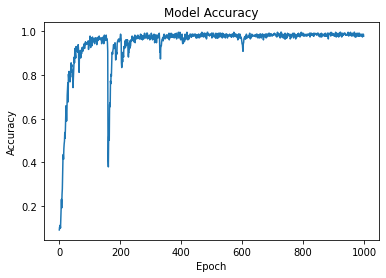

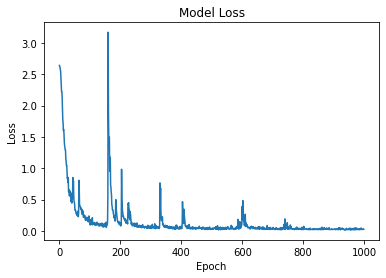

In [11]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np


In [13]:
# Evaluate the model on the training data
predictions = model.predict(input_padded)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

# Classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20

    accuracy                           0.99       229
   macro avg       0.89      0.93      0.90       229
weighted avg       0.98      0.99      0.98       229



/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Assume your data and labels are loaded and processed already

# Set up 5-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
all_true_labels = []
all_predicted_labels = []

# Iterate over the folds
for fold, (train_indices, test_indices) in enumerate(kfold.split(input_padded, np.argmax(labels, axis=1))):
    # Build the model
    model = Sequential([
        Embedding(total_words, 16, input_length=input_padded.shape[1]),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(len(data['intents']), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    history = model.fit(input_padded[train_indices], labels[train_indices], epochs=100, verbose=0)

    # Evaluate the model on the test data for this fold
    predictions = model.predict(input_padded[test_indices])
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels[test_indices], axis=1)

    # Append true and predicted labels for later analysis
    all_true_labels.extend(true_labels)
    all_predicted_labels.extend(predicted_labels)

    # Print classification report for each fold
    print(f"\nClassification Report - Fold {fold + 1}:\n")
    print(classification_report(true_labels, predicted_labels))

# Print overall classification report
print("\nOverall Classification Report:\n")
print(classification_report(all_true_labels, all_predicted_labels))


/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,



Classification Report - Fold 1:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           3       0.75      0.75      0.75         4
           4       1.00      0.75      0.86         4
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         4
           7       0.67      1.00      0.80         4
           8       1.00      1.00      1.00         4
           9       0.67      1.00      0.80         4
          10       1.00      1.00      1.00         4
          11       0.75      0.75      0.75         4
          12       1.00      0.75      0.86         4
          13       1.00      0.75      0.86         4

    accuracy                           0.83        46
   macro avg       0.76      0.73      0.73        46
weighted avg       0.86      0.83      0.83        46


Classification Report - Fold 2:

           

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm


Classification Report - Fold 3:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         4
           4       1.00      0.75      0.86         4
           5       0.50      1.00      0.67         4
           6       0.75      0.75      0.75         4
           7       1.00      0.50      0.67         4
           8       1.00      0.75      0.86         4
           9       1.00      0.25      0.40         4
          10       1.00      0.75      0.86         4
          11       0.67      1.00      0.80         4
          12       0.80      1.00      0.89         4
          13       1.00      0.75      0.86         4

    accuracy                           0.74        46
   macro avg       0.67      0.61      0.60        46
weighted avg       0.82      0.74      0.73   

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm


Classification Report - Fold 4:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      0.75      0.86         4
           4       1.00      0.75      0.86         4
           5       0.80      1.00      0.89         4
           6       1.00      0.50      0.67         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      0.75      0.86         4
          11       0.67      1.00      0.80         4
          12       0.75      0.75      0.75         4
          13       0.50      0.75      0.60         4

    accuracy                           0.80        46
   macro avg       0.69      0.66      0.66        46
weighted avg       0.84      0.80      0.81   

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm


Classification Report - Fold 5:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           3       0.60      0.75      0.67         4
           4       1.00      0.75      0.86         4
           5       0.80      1.00      0.89         4
           6       1.00      0.50      0.67         4
           7       0.80      1.00      0.89         4
           8       1.00      0.75      0.86         4
           9       1.00      0.75      0.86         4
          10       0.75      0.75      0.75         4
          11       0.80      1.00      0.89         4
          12       1.00      1.00      1.00         4
          13       0.60      0.75      0.67         4

    accuracy                           0.80        45
   macro avg       0.72      0.69      0.69        45
weighted avg       0.83      0.80      0.80        45


Overall Classification Report:

            

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adm

In [15]:
#testing code on single sentence

In [16]:

# Test the model with user input
# Test the model with user input
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    # Tokenize and pad user input
    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=input_padded.shape[1])

    # Make a prediction
    prediction = model.predict(user_input_padded)
    

    # Get the predicted tag
    predicted_tag = index_to_tag[tf.argmax(prediction[0]).numpy()]  # Convert to numpy array
    print("the tag predicted is",predicted_tag)

    # Get a random response for the predicted tag
    response = data['intents'][tag_to_index[predicted_tag]]['responses']

    print("Chatbot:", response[0])



You: How do I add or remove services from my plan?
the tag predicted is add_remove_services
Chatbot: Yes, you can add or remove services from your plan by logging into your account and navigating to the plan customization section.


KeyboardInterrupt: Interrupted by user

In [17]:
import pickle

In [18]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [19]:
tokenizer

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import json
import pickle

# Load the intents dataset
with open('intents.json') as file:
    data = json.load(file)

# ... (rest of your code)

# Save the tokenizer and mapping dictionaries
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tag_to_index.pickle', 'wb') as handle:
    pickle.dump(tag_to_index, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('index_to_tag.pickle', 'wb') as handle:
    pickle.dump(index_to_tag, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the model
model.save('chatbot_model.h5')

# Loading the tokenizer and mapping dictionaries
with open('tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

with open('tag_to_index.pickle', 'rb') as handle:
    loaded_tag_to_index = pickle.load(handle)

with open('index_to_tag.pickle', 'rb') as handle:
    loaded_index_to_tag = pickle.load(handle)

# Load the model
loaded_model = tf.keras.models.load_model('chatbot_model.h5')

# Test the loaded model with user input
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    # Tokenize and pad user input using the loaded tokenizer
    user_input_sequence = loaded_tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=input_padded.shape[1])

    # Make a prediction using the loaded model
    prediction = loaded_model.predict(user_input_padded)
    print(prediction)

    # Get the predicted tag using the loaded mapping dictionaries
    predicted_tag = loaded_index_to_tag[tf.argmax(prediction[0]).numpy()]

    # Get a random response for the predicted tag
    response = data['intents'][loaded_tag_to_index[predicted_tag]]['responses']

    print("Chatbot:", response)


You: How do I add or remove services from my plan?
[[5.8059031e-06 4.8958708e-04 4.0954680e-04 9.4626856e-05 2.5741941e-05
  2.0776715e-03 1.0628434e-06 1.5566806e-06 9.9674135e-01 7.8554804e-05
  6.7835172e-06 6.4888201e-07 5.6785997e-05 1.0296151e-05]]
Chatbot: ['Yes, you can add or remove services from your plan by logging into your account and navigating to the plan customization section.', 'To customize your plan, log in to your account and go to the plan management page where you can add or remove services.', 'You can modify your plan by adding or removing services through your account settings. Simply log in and navigate to the plan customization section.', 'To add or remove services from your plan, log in to your account and access the plan customization option.', 'Yes, you can add or remove services from your plan by logging into your account and selecting the option to customize your plan.', 'To customize your plan, log in to your account and go to the plan management page wh

KeyboardInterrupt: Interrupted by user